In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [36]:
#Load the cleaned dataset
df = pd.read_csv("../data/processed/cleaned_dataset.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (5000, 28)


,age,gender,admission_type,insurance_type,bmi,systolic_bp,diastolic_bp,blood_glucose,cholesterol,heart_rate,...,num_medications,icu_admission,risk_score,risk_category,length_of_stay,total_claim_cost,payer_coverage,patient_feedback,pulse_pressure,clinical_severity
0,69.0,Male,Elective,Government,24.198234,152.149985,91.246475,165.344609,210.342343,88.465785,...,3.0,0.0,12.0,Medium,10.548150,21709.929543,0.6,Good treatment but waiting time was long.,60.903510,1
1,32.0,Female,Elective,Government,26.123209,156.112911,74.901063,138.279525,225.434062,65.557307,...,6.0,0.0,7.0,Medium,7.630583,15452.946210,0.6,Unsatisfied with hospital service.,81.211848,1
2,89.0,Male,Elective,Government,27.658751,94.454724,73.024929,99.496088,153.370278,98.588967,...,5.0,0.0,4.0,Low,4.674591,9315.500867,0.6,Average experience overall.,21.429795,0
3,78.0,Male,Emergency,Private,28.812254,139.520216,85.082641,70.000000,199.107210,68.357545,...,4.0,0.0,4.0,Low,9.685285,20720.812733,0.8,Average experience overall.,54.437575,0
4,38.0,Male,Emergency,Private,26.925373,103.863573,70.255702,70.000000,167.883664,73.221997,...,3.0,0.0,4.0,Low,9.780789,18763.532501,0.8,Unsatisfied with hospital service.,33.607872,0


# Risk Distribution


C:\Users\Manee\AppData\Local\Temp\ipykernel_14916\176053850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


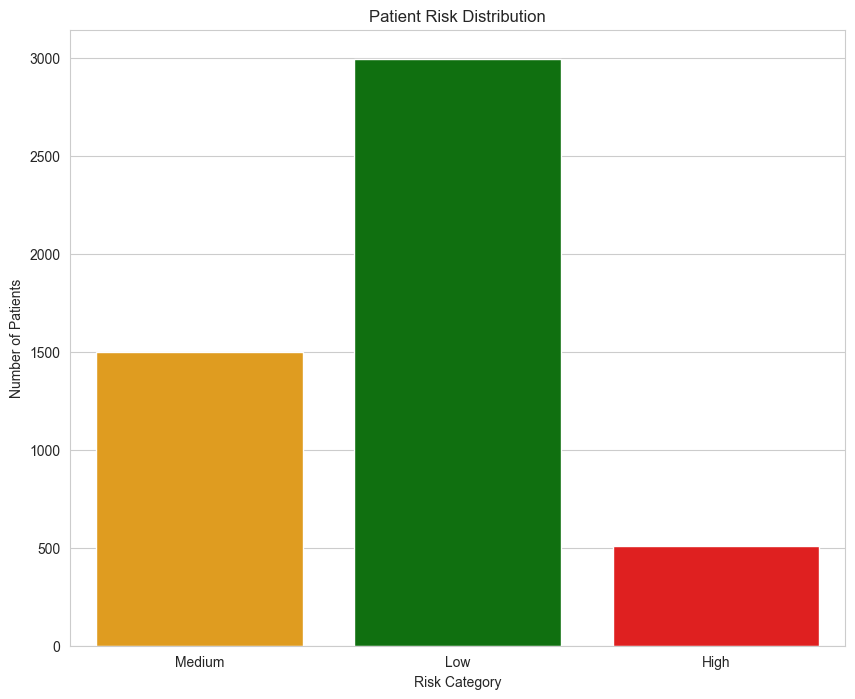

risk_category
Low       0.5986
Medium    0.2992
High      0.1022
Name: proportion, dtype: float64


In [37]:
#Risk Distribution
plt.figure(figsize=(10,8))

sns.countplot(
    x="risk_category",
    data=df,
    palette={
        "Low": "green",
        "Medium": "orange",
        "High": "red"
    }
)

plt.title("Patient Risk Distribution")
plt.xlabel("Risk Category")
plt.ylabel("Number of Patients")
plt.show()

print(df["risk_category"].value_counts(normalize=True))

## LOS Distribution

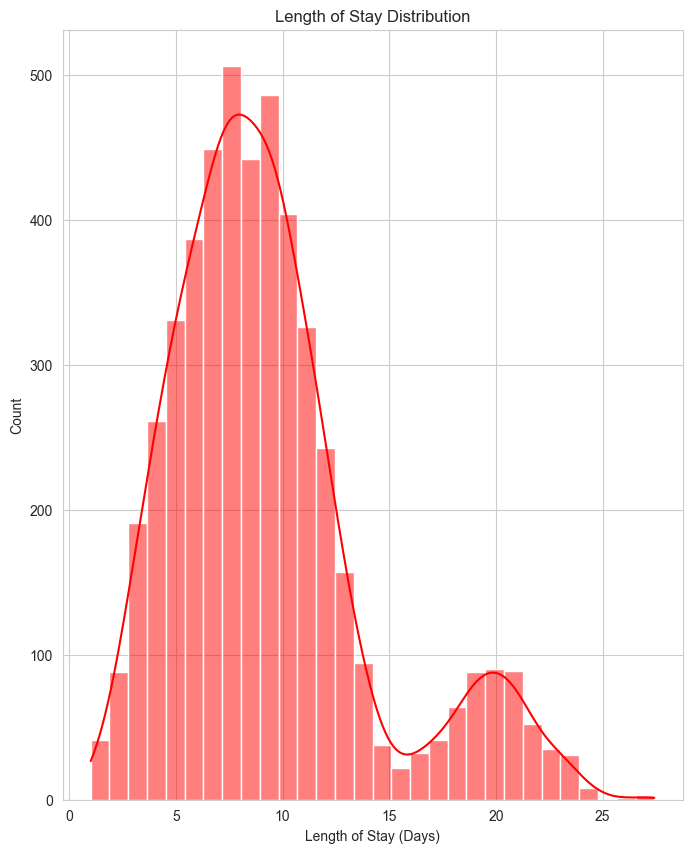

LOS Mean: 9.323609654887564
LOS Median: 8.532611944263092
LOS Skew: 1.118595136069664


In [38]:
plt.figure(figsize=(8,10))

sns.histplot(df["length_of_stay"], bins=30, kde=True, color="red")

plt.title("Length of Stay Distribution")
plt.xlabel("Length of Stay (Days)")
plt.show()

print("LOS Mean:", df["length_of_stay"].mean())
print("LOS Median:", df["length_of_stay"].median())
print("LOS Skew:", df["length_of_stay"].skew())

In [39]:
df["length_of_stay"].describe()

count    5000.000000
mean        9.323610
std         4.656670
min         1.000000
25%         6.184493
50%         8.532612
75%        11.130218
max        27.431176
Name: length_of_stay, dtype: float64

## LOS by Risk Category

C:\Users\Manee\AppData\Local\Temp\ipykernel_14916\661828537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


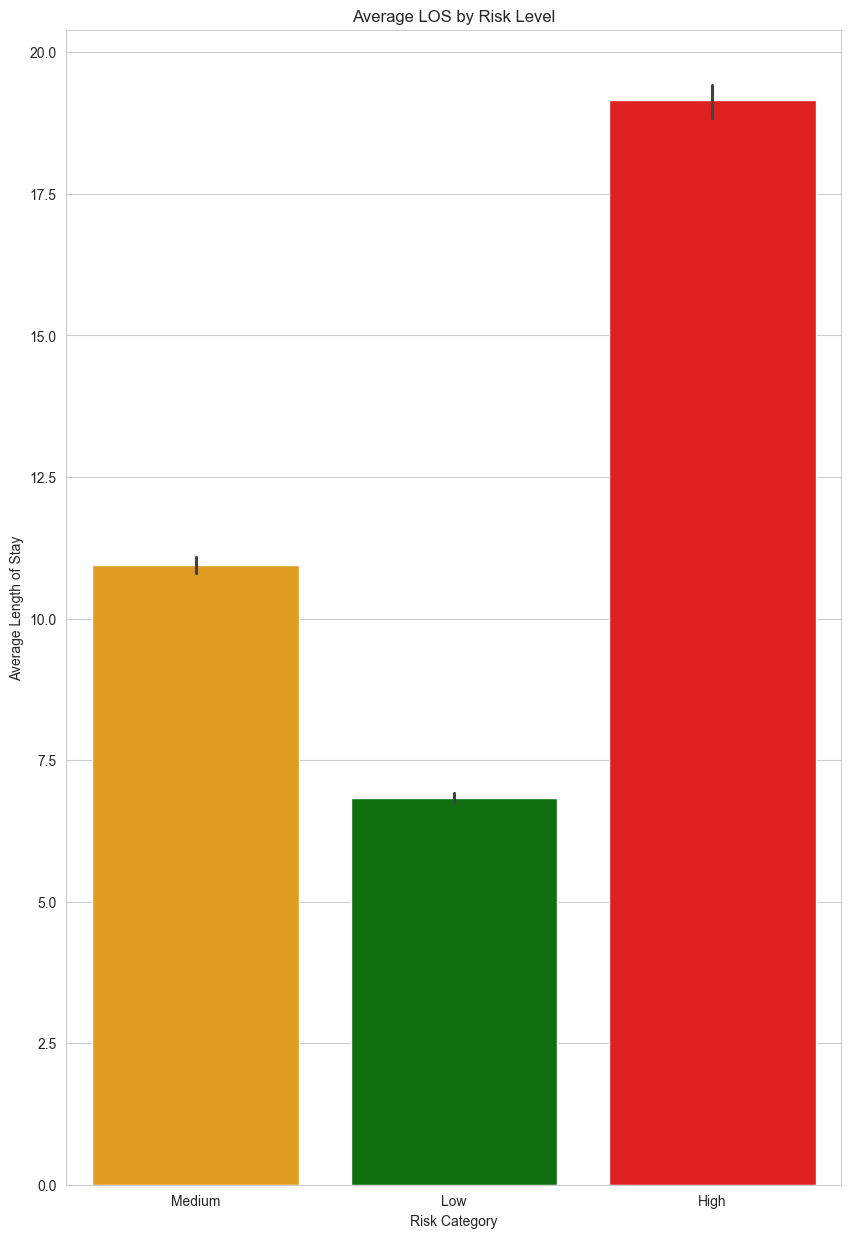

risk_category
High      19.151772
Low        6.836320
Medium    10.942772
Name: length_of_stay, dtype: float64


In [40]:
plt.figure(figsize=(10,15))

sns.barplot(
    x="risk_category",
    y="length_of_stay",
    data=df,
    palette={
        "Low": "green",
        "Medium": "orange",
        "High": "red"
    }
)

plt.title("Average LOS by Risk Level")
plt.ylabel("Average Length of Stay")
plt.xlabel("Risk Category")
plt.show()

print(df.groupby("risk_category")["length_of_stay"].mean())

# Gluscose by Diabetes

C:\Users\Manee\AppData\Local\Temp\ipykernel_14916\568318269.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


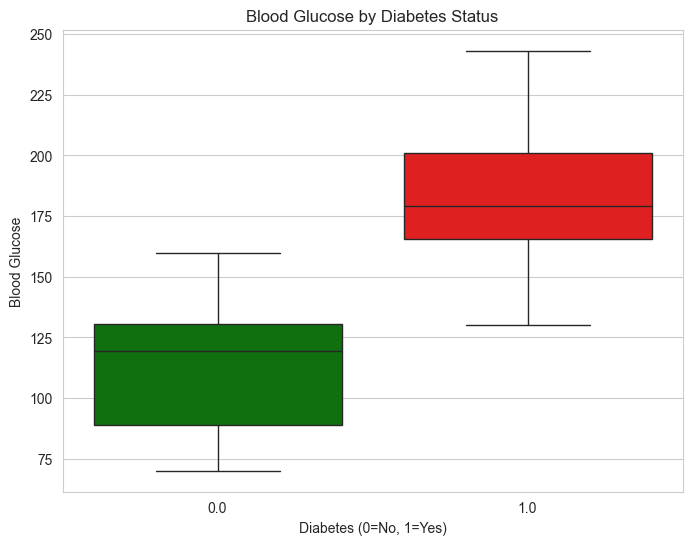

diabetes
0.0    112.823703
1.0    181.844210
Name: blood_glucose, dtype: float64


In [41]:
#Glucose by Diabetes Status
plt.figure(figsize=(8,6))

sns.boxplot(
    x="diabetes",
    y="blood_glucose",
    data=df,
    palette=["green", "red"]
)

plt.title("Blood Glucose by Diabetes Status")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Blood Glucose")
plt.show()

print(df.groupby("diabetes")["blood_glucose"].mean())

C:\Users\Manee\AppData\Local\Temp\ipykernel_14916\397918636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


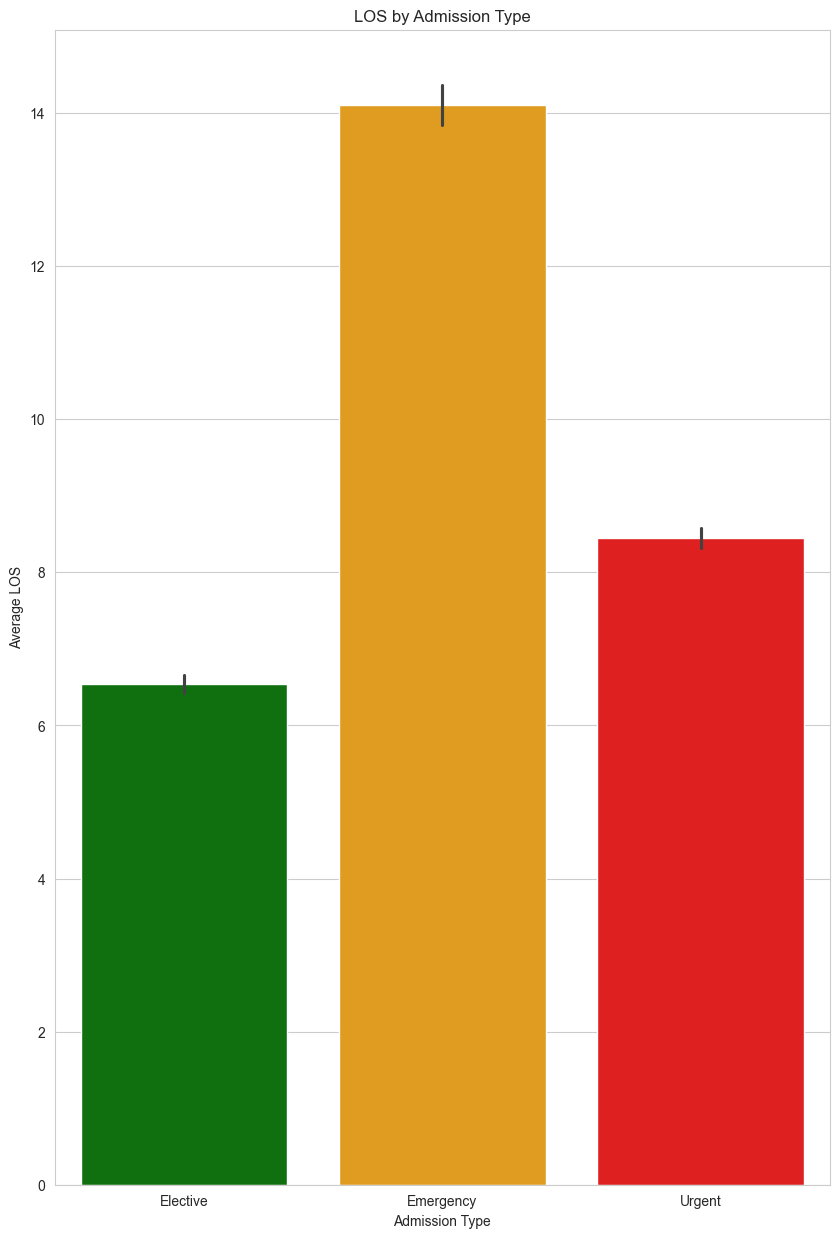

admission_type
Elective      6.544585
Emergency    14.109839
Urgent        8.445424
Name: length_of_stay, dtype: float64


In [42]:
plt.figure(figsize=(10,15))

sns.barplot(
    x="admission_type",
    y="length_of_stay",
    data=df,
    palette=["green", "orange", "red"]
)

plt.title("LOS by Admission Type")
plt.ylabel("Average LOS")
plt.xlabel("Admission Type")
plt.show()

print(df.groupby("admission_type")["length_of_stay"].mean())

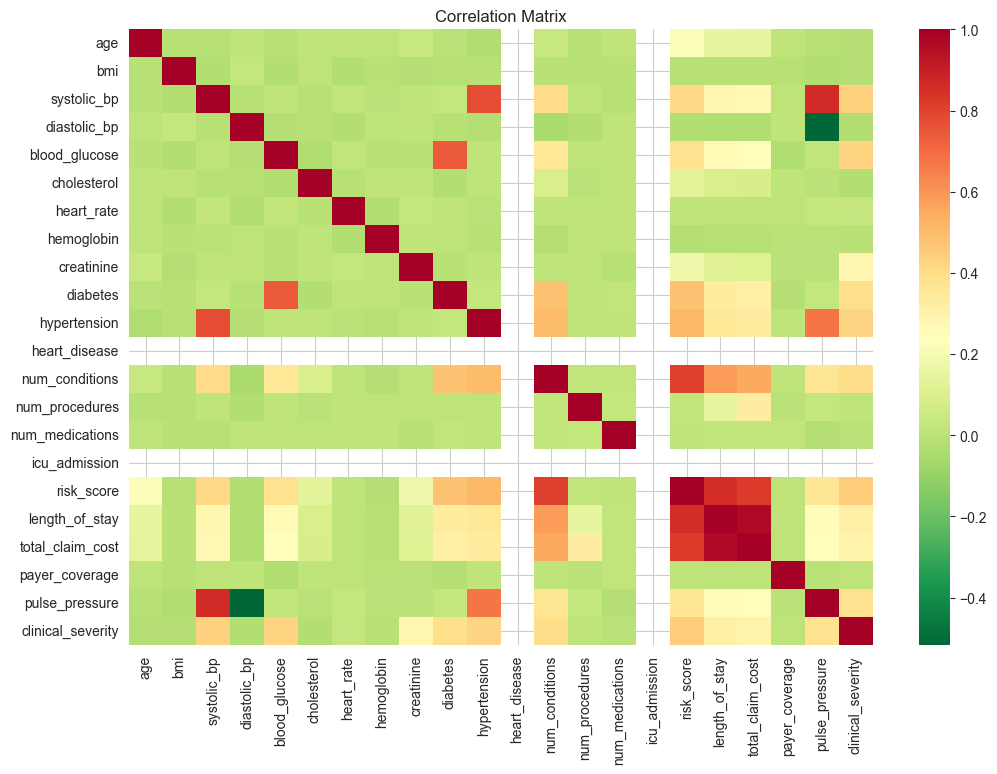

In [43]:
plt.figure(figsize=(12,8))

sns.heatmap(
    df.corr(numeric_only=True),
    cmap="RdYlGn_r",
    annot=False
)

plt.title("Correlation Matrix")
plt.show()